In [2]:
import pandas as pd

df = pd.read_csv('meritocracy_detailed3.csv')
filtered_df = df[df['time_step'] > 39]
df

,time_step,trainee_id,performance,personality,personality_effect,entry_time,promotion_time,group_id,group_score,group_share_normal,...,5-0-0_filter,group_internal_performance_residiual_from_mean,group_internal_performance_std,group_score_change_after_rehiring,performance_change_after_rehiring,group_score_increased_by_learning,performance_increased_by_learning,new_guy_filter,last_promoted,newest_group_member
0,0,0,1.6772,normal,0.0000,0,NaN,0,6.1744,0.6,...,False,0.4423,0.6136,NaN,NaN,NaN,NaN,False,NaN,NaN
1,0,1,2.1150,overachiever,-0.5253,0,NaN,0,6.1744,0.6,...,False,0.8801,0.6136,NaN,NaN,NaN,NaN,False,NaN,NaN
2,0,2,0.6155,normal,0.0000,0,NaN,0,6.1744,0.6,...,False,-0.6194,0.6136,NaN,NaN,NaN,NaN,False,NaN,NaN
3,0,3,1.2584,normal,0.0000,0,NaN,0,6.1744,0.6,...,False,0.0235,0.6136,NaN,NaN,NaN,NaN,False,NaN,NaN
4,0,4,0.5083,charismatic_idiot,1.5967,0,NaN,0,6.1744,0.6,...,False,-0.7266,0.6136,NaN,NaN,NaN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99,5949,1.1659,normal,0.0000,99,NaN,199,9.8206,0.8,...,False,-0.7982,1.3218,-2.6593,-2.6592,NaN,NaN,True,normal,normal
99996,99,5449,0.6194,normal,0.0000,89,NaN,199,9.8206,0.8,...,False,-1.3447,1.3218,-2.6593,0.0000,NaN,NaN,False,normal,normal
99997,99,4849,3.5710,normal,0.0000,77,NaN,199,9.8206,0.8,...,False,1.6069,1.3218,-2.6593,0.0000,NaN,NaN,False,normal,normal
99998,99,5649,3.5673,overachiever,-0.8383,93,NaN,199,9.8206,0.8,...,False,1.6032,1.3218,-2.6593,0.0000,NaN,NaN,False,normal,normal


In [3]:
import numpy as np
from tabulate import tabulate


df_metrisch = df[['performance', 'promotion_time',	'group_score','group_share_normal', 'group_share_overachiever', 'group_share_charismatic_idiot', 'time_step']]
df_metrisch

table = df_metrisch.describe().T


table['skew'] = df_metrisch.skew()
table['kurtosis'] = df_metrisch.kurtosis()


table['range'] = table['max'] - table['min']


table = table.rename(columns={'count': 'n', 'std': 'sd', '50%': 'median'})


table = table[['n', 'mean', 'sd', 'median', 'min', 'max', 'range', 'skew', 'kurtosis']]


table = table.round(3)

print(table)

                                      n    mean      sd  median   min     max  \
performance                    100000.0   2.309   1.329   2.085  0.00  10.517   
promotion_time                   5000.0  49.500  28.869  49.500  0.00  99.000   
group_score                    100000.0  11.547   2.367  11.720  2.55  18.438   
group_share_normal             100000.0   0.563   0.229   0.600  0.00   1.000   
group_share_overachiever       100000.0   0.161   0.166   0.200  0.00   1.000   
group_share_charismatic_idiot  100000.0   0.276   0.196   0.200  0.00   1.000   
time_step                      100000.0  49.500  28.866  49.500  0.00  99.000   

                                range   skew  kurtosis  
performance                    10.517  0.764     0.411  
promotion_time                 99.000  0.000    -1.200  
group_score                    15.888 -0.404     0.009  
group_share_normal              1.000 -0.117    -0.367  
group_share_overachiever        1.000  0.863     0.371  
group_sha

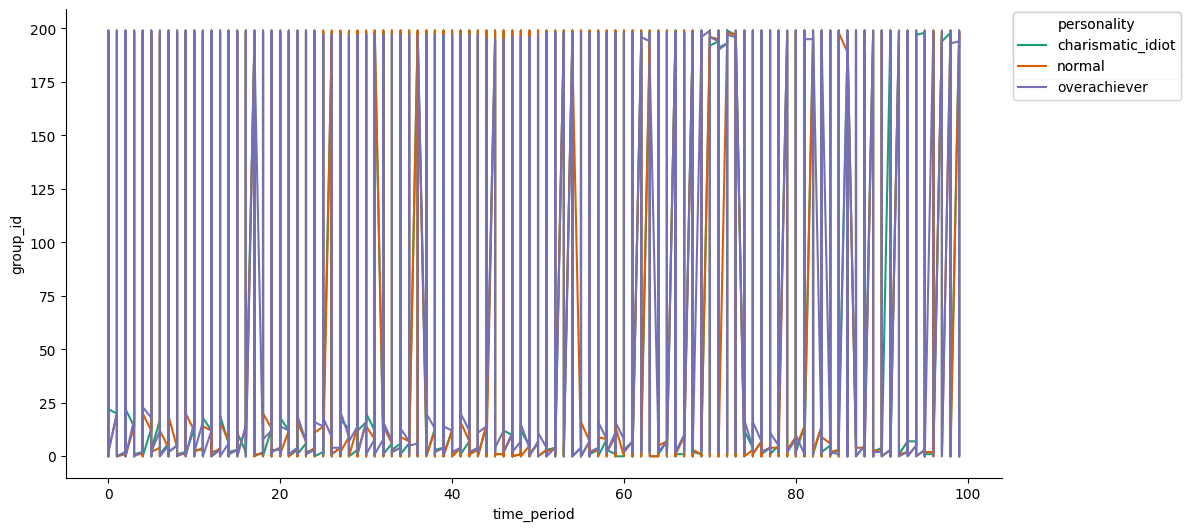

In [5]:
# @title time_period vs group_id

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['time_step']
  ys = series['group_id']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('time_step', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('personality')):
  _plot_series(series, series_name, i)
  fig.legend(title='personality', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('time_period')
_ = plt.ylabel('group_id')

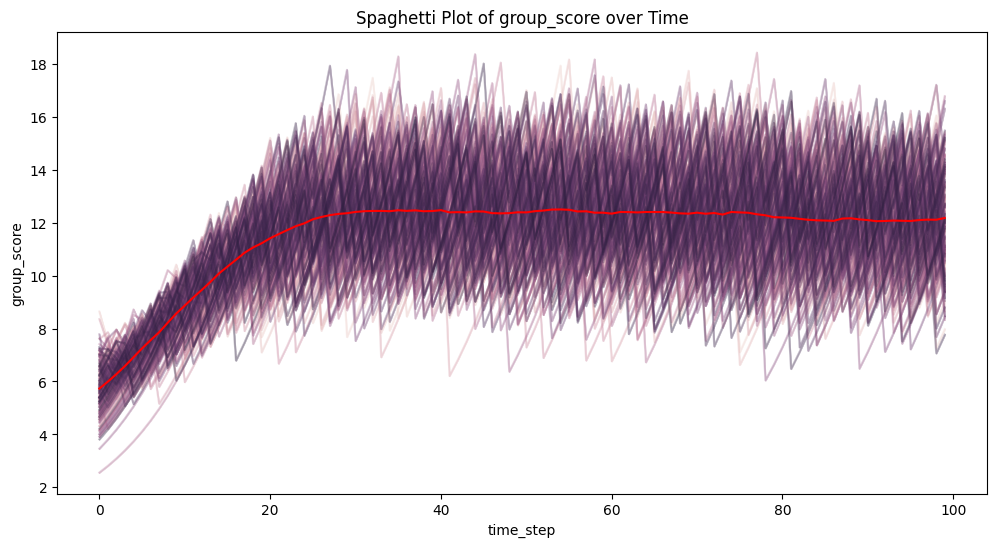

In [6]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='time_step', y='group_score', hue='group_id', alpha=0.3, legend=False)
sns.lineplot(data=df, x='time_step', y='group_score', errorbar='none', ci=None, color='red', linewidth=1.5)
plt.title('Spaghetti Plot of group_score over Time')
plt.xlabel('time_step')
plt.ylabel('group_score')
plt.show()

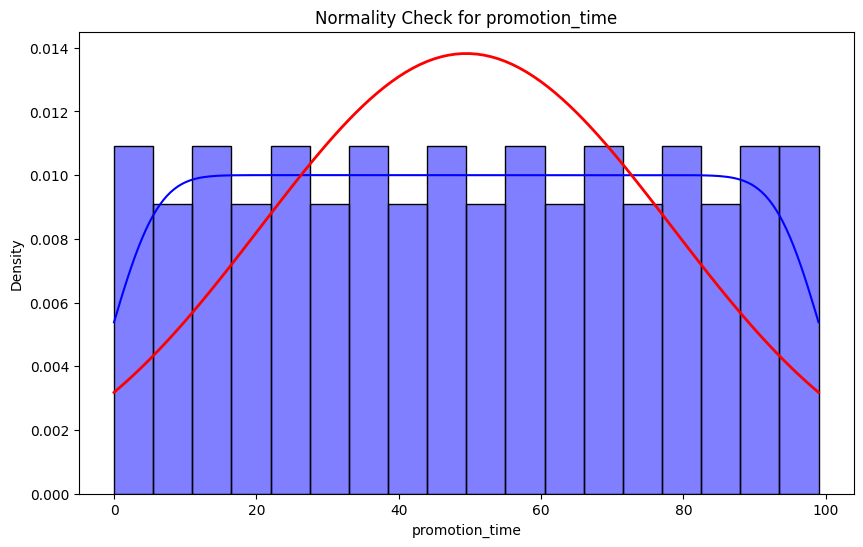

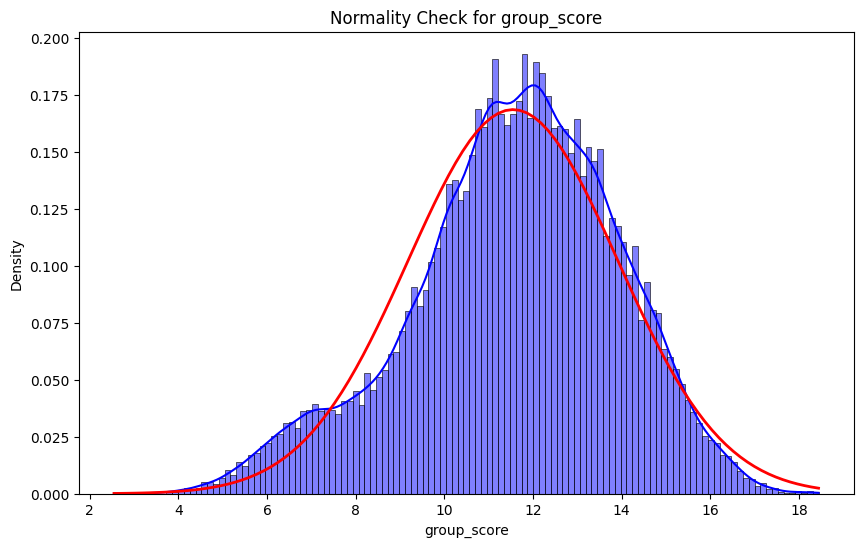

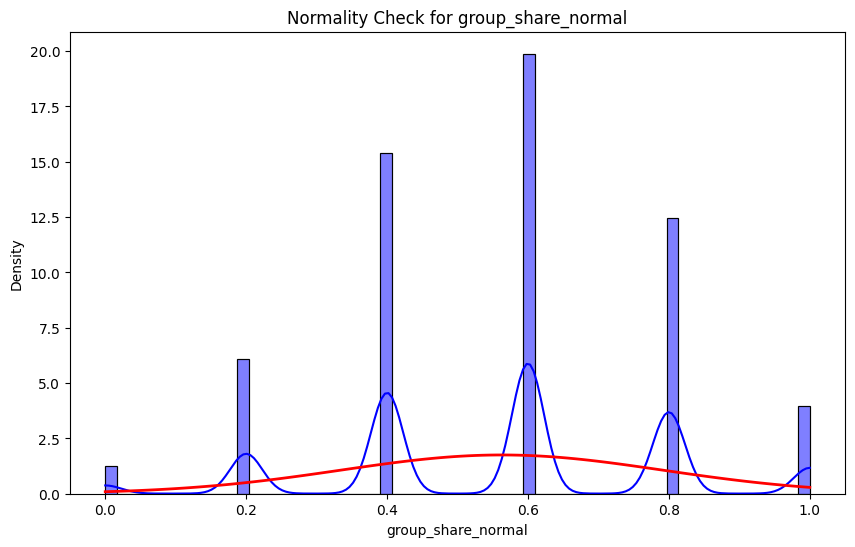

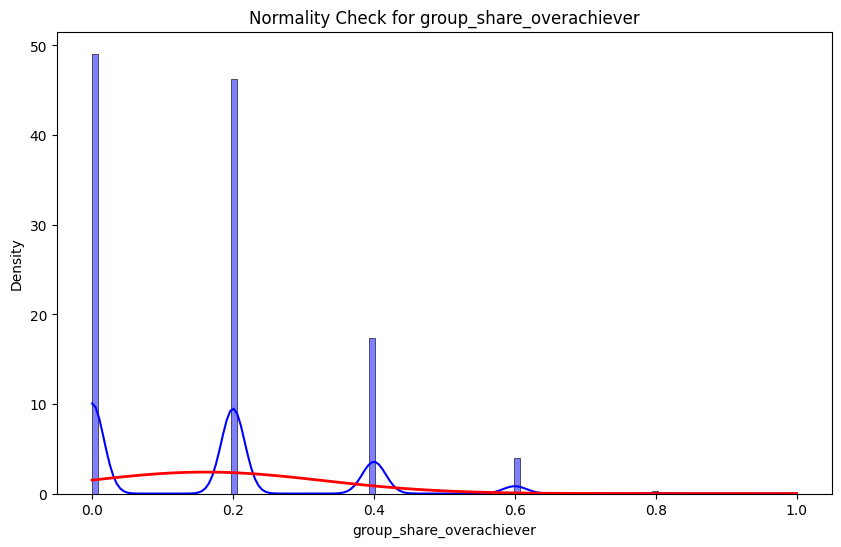

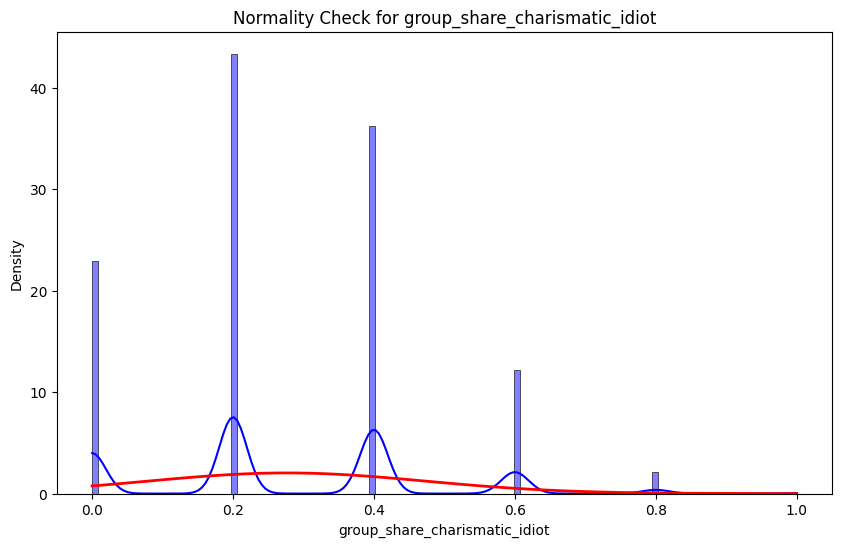

In [7]:
from scipy import stats


def plot_normality(df, variable):
    plt.figure(figsize=(10, 6))
    sns.histplot(df[variable], kde=True, stat='density', color='blue', alpha=0.5)

    # Add normal distribution curve
    x = np.linspace(df[variable].min(), df[variable].max(), 100)
    y = stats.norm.pdf(x, df[variable].mean(), df[variable].std())
    plt.plot(x, y, color='red', linewidth=2)

    plt.title(f'Normality Check for {variable}')
    plt.xlabel(variable)
    plt.ylabel('Density')
    plt.show()

variables = ['performance', 'promotion_time',	'group_score','group_share_normal', 'group_share_overachiever', 'group_share_charismatic_idiot']


for var in variables[1:]:
    plot_normality(df, var)

                       Var1         Var2     value
0               performance  performance  1.000000
1            promotion_time  performance  0.417455
2               group_score  performance  0.356135
3        group_share_normal  performance -0.027356
4  group_share_overachiever  performance -0.019169


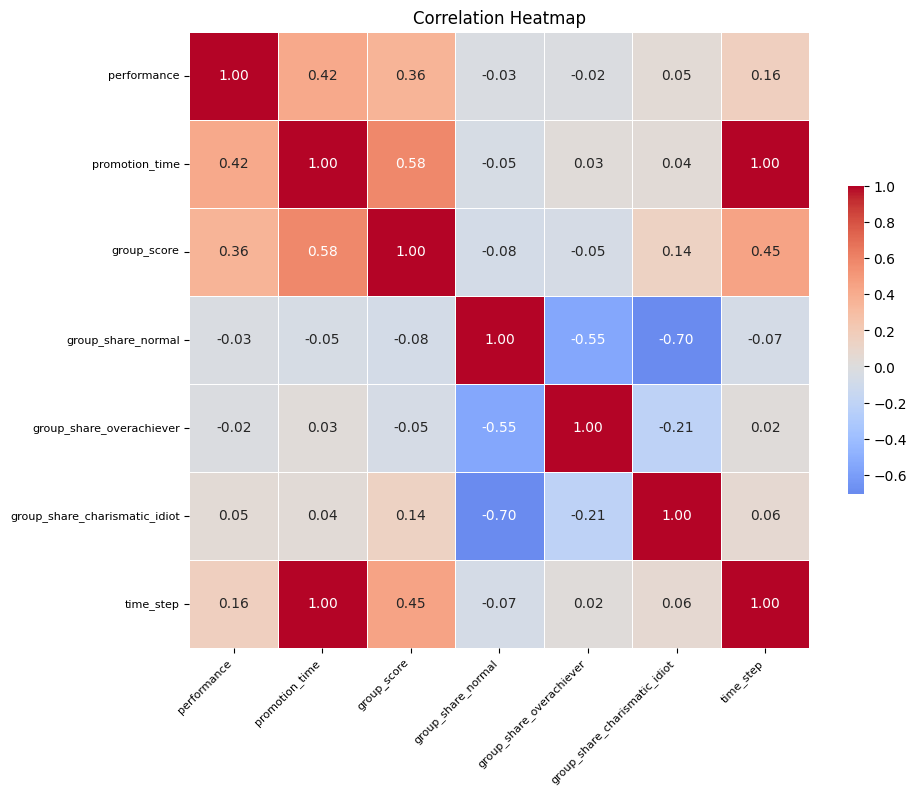

In [8]:

cor_matrix = df_metrisch.corr()


melted_cor_matrix = cor_matrix.reset_index().melt(id_vars='index')
melted_cor_matrix.columns = ['Var1', 'Var2', 'value']

print(melted_cor_matrix.head())
plt.figure(figsize=(10, 8))
heatmap_plot = sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
                          linewidths=.5, cbar_kws={'shrink': .5})
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)
plt.show()